In [67]:
# Required Packages and Functions

In [68]:
%matplotlib inline
import matplotlib.pylab as plt

import pandas as pd
import numpy as np
import statsmodels as sm

In [69]:
# Time Series Analysis Background Knowledge

In [70]:
# The Lynx Dataset and Time Series Vectors and Lags
# Importing the data with pandas and using its 'year' column for the index
# Make sure that LYNXdata.csv is in the same folder as this python notebook
mylynx_df = pd.read_csv("LYNXdata.csv", header = 0,
                     names = ['year', 'trappings'],
                     index_col = 0)

In [71]:
# Checking the data - Note the index/ time stamp 'year'
mylynx_df.trappings

year
1821     269
1822     321
1823     585
1824     871
1825    1475
1826    2821
1827    3928
1828    5943
1829    4950
1830    2577
1831     523
1832      98
1833     184
1834     279
1835     409
1836    2285
1837    2685
1838    3409
1839    1824
1840     409
1841     151
1842      45
1843      68
1844     213
1845     546
1846    1033
1847    2129
1848    2536
1849     957
1850     361
        ... 
1905    6313
1906    3794
1907    1836
1908     345
1909     382
1910     808
1911    1388
1912    2713
1913    3800
1914    3091
1915    2985
1916    3790
1917     674
1918      81
1919      80
1920     108
1921     229
1922     399
1923    1132
1924    2432
1925    3574
1926    2935
1927    1537
1928     529
1929     485
1930     662
1931    1000
1932    1590
1933    2657
1934    3396
Name: trappings, Length: 114, dtype: int64

In [72]:
# Data is still a DataFrame (pandas)
type(mylynx_df)

pandas.core.frame.DataFrame

In [73]:
# Converting the DataFrame into a Series object
# Reusing existing index - the new object inherits the index
# Basically extracting the 'trappings' column from my data
mylynxts_simple = mylynx_df['trappings']
type(mylynxts_simple)

pandas.core.series.Series

In [74]:
mylynxts_simple.head()

year
1821     269
1822     321
1823     585
1824     871
1825    1475
Name: trappings, dtype: int64

In [75]:
# Converting the DataFrame into a Series object
# New index generation with proper date index
mylynxts = pd.Series(mylynx_df['trappings'].values,
                     index = pd.date_range('31/12/1821' ,
                                           periods = 114,
                                           freq = 'A-DEC'))

In [76]:
# Note the new index format (d-m-Y)
mylynxts

1821-12-31     269
1822-12-31     321
1823-12-31     585
1824-12-31     871
1825-12-31    1475
1826-12-31    2821
1827-12-31    3928
1828-12-31    5943
1829-12-31    4950
1830-12-31    2577
1831-12-31     523
1832-12-31      98
1833-12-31     184
1834-12-31     279
1835-12-31     409
1836-12-31    2285
1837-12-31    2685
1838-12-31    3409
1839-12-31    1824
1840-12-31     409
1841-12-31     151
1842-12-31      45
1843-12-31      68
1844-12-31     213
1845-12-31     546
1846-12-31    1033
1847-12-31    2129
1848-12-31    2536
1849-12-31     957
1850-12-31     361
              ... 
1905-12-31    6313
1906-12-31    3794
1907-12-31    1836
1908-12-31     345
1909-12-31     382
1910-12-31     808
1911-12-31    1388
1912-12-31    2713
1913-12-31    3800
1914-12-31    3091
1915-12-31    2985
1916-12-31    3790
1917-12-31     674
1918-12-31      81
1919-12-31      80
1920-12-31     108
1921-12-31     229
1922-12-31     399
1923-12-31    1132
1924-12-31    2432
1925-12-31    3574
1926-12-31  

In [77]:
# Test for Stationarity
def stationarity_test(timeseries):
    """"Augmented Dickey-Fuller Test
    Test for Stationarity"""
    from statsmodels.tsa.stattools import adfuller
    print("Results of Dickey-Fuller Test:")
    df_test = adfuller(timeseries, autolag = "AIC")
    df_output = pd.Series(df_test[0:4],
                          index = ["Test Statistic", "p-value", "#Lags Used",
                                   "Number of Observations Used"])
    print(df_output)

In [78]:
# Test application on the Lynx dataset
stationarity_test(mylynxts)

Results of Dickey-Fuller Test:
Test Statistic                  -2.996304
p-value                          0.035241
#Lags Used                       7.000000
Number of Observations Used    106.000000
dtype: float64


In [79]:
# Test application on random normally distributed numbers
stationarity_test(np.random.normal(1, 3, 300))

Results of Dickey-Fuller Test:
Test Statistic                -1.797879e+01
p-value                        2.779410e-30
#Lags Used                     0.000000e+00
Number of Observations Used    2.990000e+02
dtype: float64


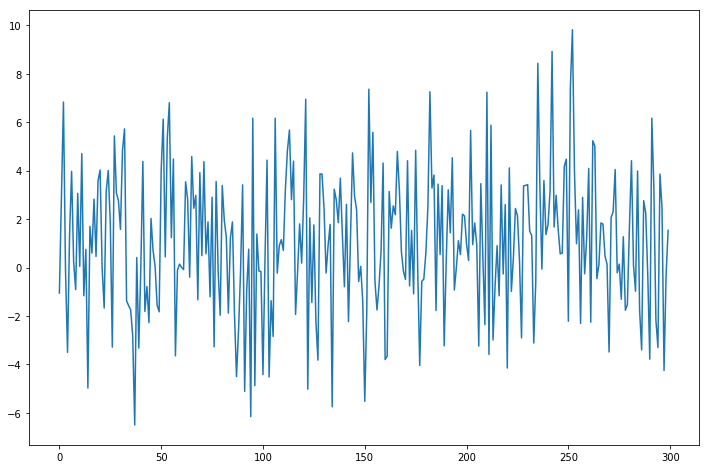

In [80]:
# Note the characteristics of stationary data on the plot
plt.figure(figsize=(12,8))
plt.plot(np.random.normal(1, 3, 300))

In [81]:
# Test application on a vector of numbers
mydata = (3, 5, 3, 65, 64, 64, 65, 643, 546, 546, 544)

stationarity_test(mydata)

Results of Dickey-Fuller Test:
Test Statistic                 0.000000
p-value                        0.958532
#Lags Used                     6.000000
Number of Observations Used    4.000000
dtype: float64


c:\users\rahul udaiwal\appdata\local\programs\python\python37\lib\site-packages\statsmodels\regression\linear_model.py:1510: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


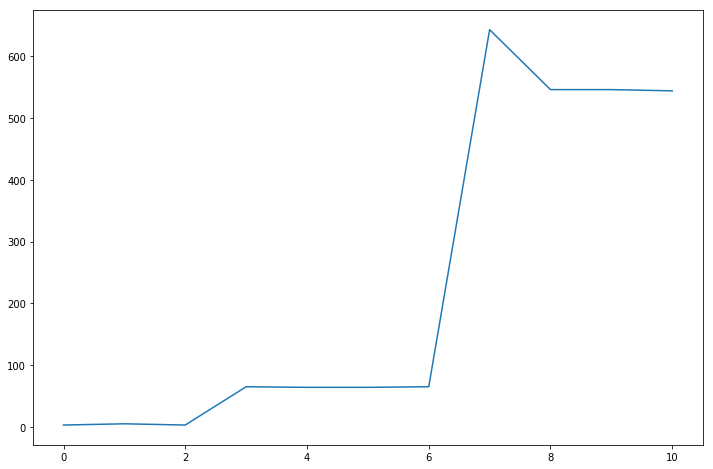

In [82]:
# Note the three levels in the data
plt.figure(figsize=(12,8))
plt.plot(mydata)

In [83]:
# Classic ACF and PACF Plots for Autocorrelation
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

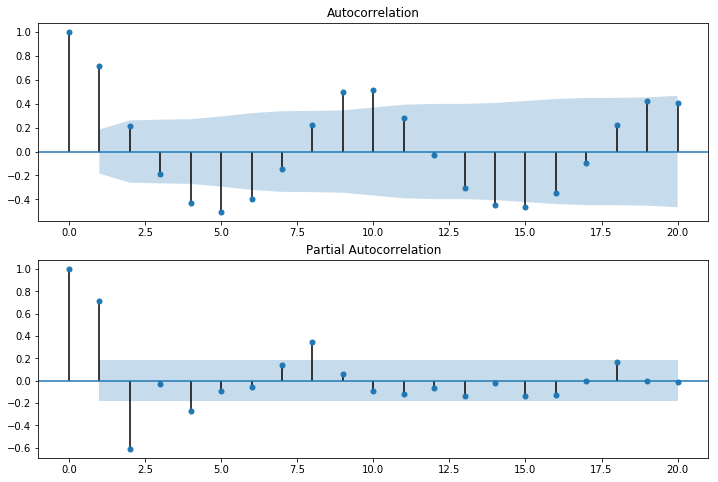

In [84]:
# Autocorrelation and partical autocorrelation in the Lynx dataset
# Two plots on one sheet
%matplotlib inline
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(mylynxts, lags=20, ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(mylynxts, lags=20, ax=ax2)

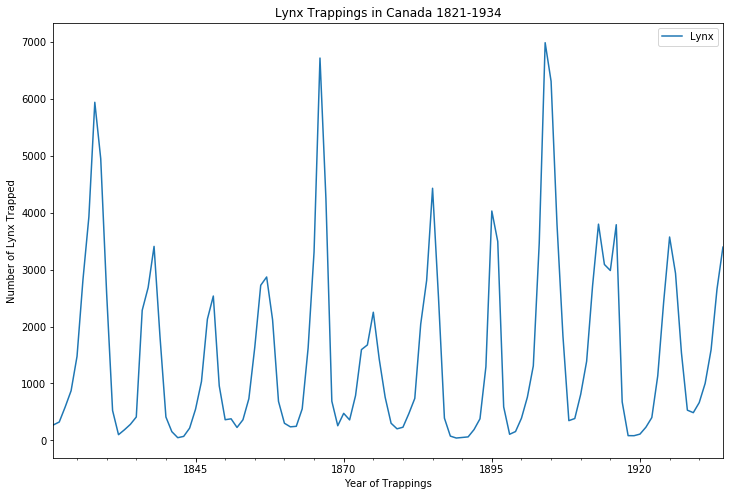

In [85]:
# Visualizing Time Series in Python
# Line graph with matplotlib pyplot module
plt.figure(figsize=(12,8))
mylynxts.plot()
plt.title('Lynx Trappings in Canada 1821-1934')
plt.xlabel('Year of Trappings')
plt.ylabel('Number of Lynx Trapped')
plt.legend(['Lynx'])

In [86]:
# Plotting two series on the same plot
# Getting the cumsum of mylynxts
# Series object, therefore the index is inherited
cumsum_lynx = np.cumsum(mylynxts)

In [87]:
cumsum_lynx.head()

1821-12-31     269
1822-12-31     590
1823-12-31    1175
1824-12-31    2046
1825-12-31    3521
Freq: A-DEC, dtype: int64

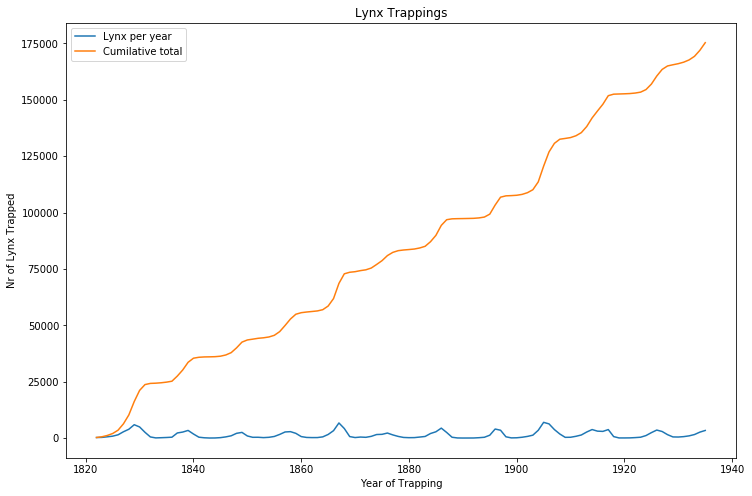

In [88]:
plt.figure(figsize=(12,8))
plt.plot(mylynxts)
plt.plot(cumsum_lynx)
plt.title('Lynx Trappings')
plt.xlabel('Year of Trapping')
plt.ylabel('Nr of Lynx Trapped')
plt.legend(['Lynx per year', 'Cumilative total'])

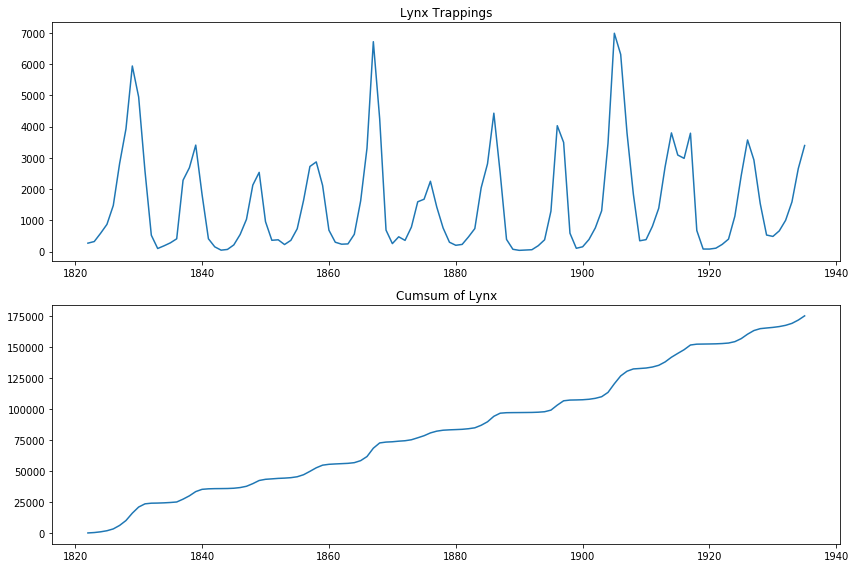

In [89]:
# Getting two visualizations in the same output cell
plt.figure(figsize=(12,8))
plt.subplot(2,1,1)
plt.plot(mylynxts)
plt.title('Lynx Trappings')

plt.subplot(2,1,2)
plt.plot(cumsum_lynx)
plt.title('Cumsum of Lynx')
plt.tight_layout()

In [90]:
# Simple moving (rolling) calculations
# Note: the rolling methods are applicable only on pandas Series and DataFrame objects
def plot_rolling(timeseries, window):
    rol_mean = timeseries.rolling(window).mean()
    rol_std = timeseries.rolling(window).std()
    
    fig = plt.figure(figsize = (12, 8))
    og = plt.plot(timeseries, color = "blue", label = "Original")
    mean = plt.plot(rol_mean, color = "red", label = "Rolling Mean")
    std = plt.plot(rol_std, color = "black", label = "Rolling Std")
    plt.legend(loc = "best")
    plt.title("Rolling Mean and Standard Deviation (window = "+str(window)+")")
    plt.show()

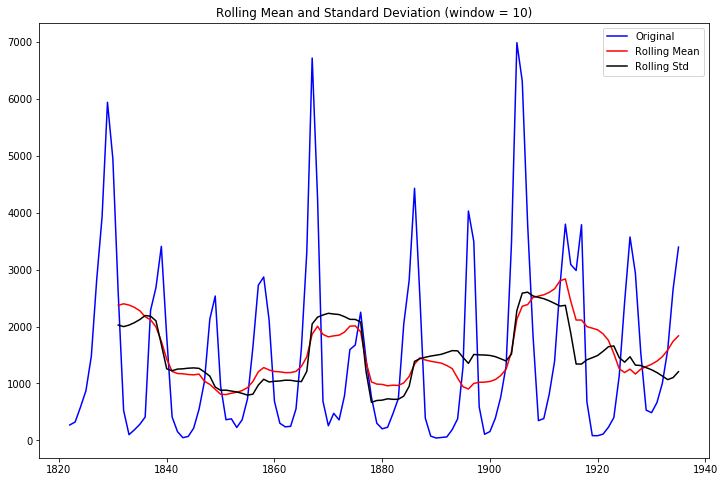

In [91]:
plot_rolling(mylynxts,10)

In [92]:
# Getting the smooth values only
mylynxts.rolling(10).mean()

1821-12-31       NaN
1822-12-31       NaN
1823-12-31       NaN
1824-12-31       NaN
1825-12-31       NaN
1826-12-31       NaN
1827-12-31       NaN
1828-12-31       NaN
1829-12-31       NaN
1830-12-31    2374.0
1831-12-31    2399.4
1832-12-31    2377.1
1833-12-31    2337.0
1834-12-31    2277.8
1835-12-31    2171.2
1836-12-31    2117.6
1837-12-31    1993.3
1838-12-31    1739.9
1839-12-31    1427.3
1840-12-31    1210.5
1841-12-31    1173.3
1842-12-31    1168.0
1843-12-31    1156.4
1844-12-31    1149.8
1845-12-31    1163.5
1846-12-31    1038.3
1847-12-31     982.7
1848-12-31     895.4
1849-12-31     808.7
1850-12-31     803.9
               ...  
1905-12-31    2356.1
1906-12-31    2386.0
1907-12-31    2510.9
1908-12-31    2534.9
1909-12-31    2557.8
1910-12-31    2599.9
1911-12-31    2662.9
1912-12-31    2803.5
1913-12-31    2837.0
1914-12-31    2447.0
1915-12-31    2114.2
1916-12-31    2113.8
1917-12-31    1997.6
1918-12-31    1971.2
1919-12-31    1941.0
1920-12-31    1871.0
1921-12-31   

In [93]:
# Simple rolling calculation with minimum number of periods
def plot_rolling2(timeseries, window):
    rol_mean = timeseries.rolling(window, min_periods = 1).mean()
    rol_std = timeseries.rolling(window, min_periods = 1).std()
    
    fig = plt.figure(figsize = (12, 8))
    og = plt.plot(timeseries, color = "blue", label = "Original")
    mean = plt.plot(rol_mean, color = "red", label = "Rolling Mean")
    std = plt.plot(rol_std, color = "black", label = "Rolling Std")
    plt.legend(loc = "best")
    plt.title("Rolling Mean and Standard Deviation (window = "+str(window)+")")
    plt.show()

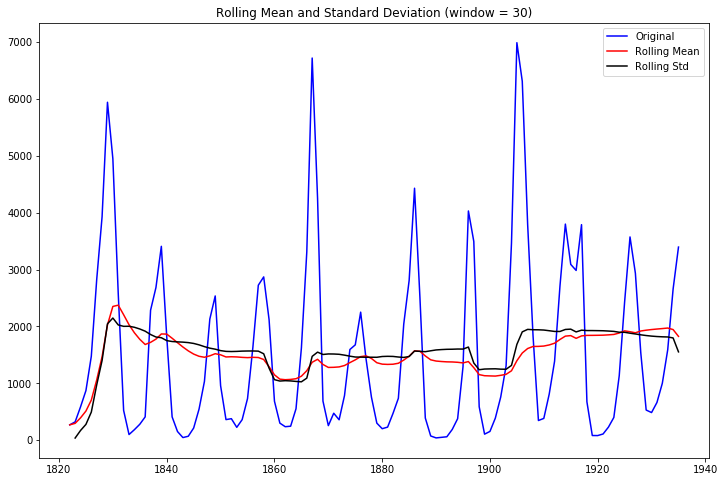

In [94]:
# No NA values, but shorter window size
plot_rolling2(mylynxts, 30)

In [95]:
# Getting the smooth values only - minimum periods = 1
mylynxts.rolling(30, min_periods = 1).mean()

1821-12-31     269.000000
1822-12-31     295.000000
1823-12-31     391.666667
1824-12-31     511.500000
1825-12-31     704.200000
1826-12-31    1057.000000
1827-12-31    1467.142857
1828-12-31    2026.625000
1829-12-31    2351.444444
1830-12-31    2374.000000
1831-12-31    2205.727273
1832-12-31    2030.083333
1833-12-31    1888.076923
1834-12-31    1773.142857
1835-12-31    1682.200000
1836-12-31    1719.875000
1837-12-31    1776.647059
1838-12-31    1867.333333
1839-12-31    1865.052632
1840-12-31    1792.250000
1841-12-31    1714.095238
1842-12-31    1638.227273
1843-12-31    1569.956522
1844-12-31    1513.416667
1845-12-31    1474.720000
1846-12-31    1457.730769
1847-12-31    1482.592593
1848-12-31    1520.214286
1849-12-31    1500.793103
1850-12-31    1462.800000
                 ...     
1905-12-31    1532.300000
1906-12-31    1611.233333
1907-12-31    1647.233333
1908-12-31    1648.766667
1909-12-31    1654.800000
1910-12-31    1674.100000
1911-12-31    1704.733333
1912-12-31  

In [96]:
# Exponentially Weighted Moving Average
# Note: the ewm method is applicable on pandas Series and DataFrame objects only
def plot_ewma(timeseries, alpha):
    expw_ma = timeseries.ewm(alpha=alpha).mean()

    fig = plt.figure(figsize = (12, 8))
    og_line = plt.plot(timeseries, color = "blue", label = "Original")
    exwm_line = plt.plot(expw_ma, color = "red", label = "EWMA")
    plt.legend(loc = "best")
    plt.title("EWMA (alpha= "+str(alpha)+")")
    plt.show()

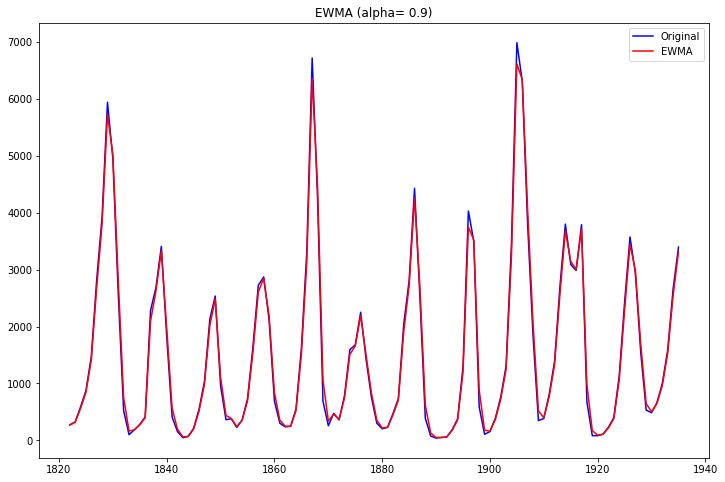

In [97]:
plot_ewma(mylynxts, 0.9)

In [98]:
# ARIMA Models in Python

In [99]:
# ARIMA Parameter Selection
# Note the date format (DatetimeIndex + tuple), it is required for the ARIMA function we use below
mylynxts = pd.Series(mylynx_df['trappings'].values,
                 index = pd.DatetimeIndex(data = (tuple(pd.date_range('31/12/1821',
                                                                      periods = 114,
                                                                      freq = 'A-DEC'))),
                                          freq = 'A-DEC'))

In [100]:
mylynxts

1821-12-31     269
1822-12-31     321
1823-12-31     585
1824-12-31     871
1825-12-31    1475
1826-12-31    2821
1827-12-31    3928
1828-12-31    5943
1829-12-31    4950
1830-12-31    2577
1831-12-31     523
1832-12-31      98
1833-12-31     184
1834-12-31     279
1835-12-31     409
1836-12-31    2285
1837-12-31    2685
1838-12-31    3409
1839-12-31    1824
1840-12-31     409
1841-12-31     151
1842-12-31      45
1843-12-31      68
1844-12-31     213
1845-12-31     546
1846-12-31    1033
1847-12-31    2129
1848-12-31    2536
1849-12-31     957
1850-12-31     361
              ... 
1905-12-31    6313
1906-12-31    3794
1907-12-31    1836
1908-12-31     345
1909-12-31     382
1910-12-31     808
1911-12-31    1388
1912-12-31    2713
1913-12-31    3800
1914-12-31    3091
1915-12-31    2985
1916-12-31    3790
1917-12-31     674
1918-12-31      81
1919-12-31      80
1920-12-31     108
1921-12-31     229
1922-12-31     399
1923-12-31    1132
1924-12-31    2432
1925-12-31    3574
1926-12-31  

In [101]:
# Test for stationarity - Parameter d
# Applying the Augmented Dickey-Fuller test function we created in the previous section
stationarity_test(mylynxts)

Results of Dickey-Fuller Test:
Test Statistic                  -2.996304
p-value                          0.035241
#Lags Used                       7.000000
Number of Observations Used    106.000000
dtype: float64


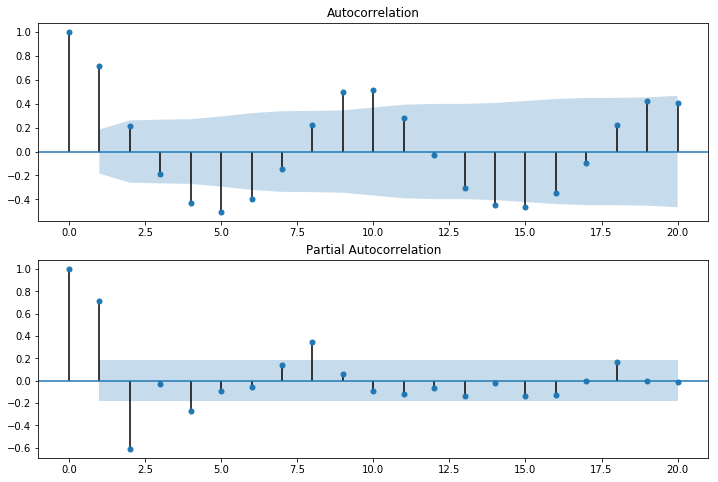

In [102]:
# Tests for autocorrelation and partical autocorrelation - Parameters p, q
%matplotlib inline
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(mylynxts, lags=20, ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(mylynxts, lags=20, ax=ax2)

In [103]:
# ARIMA Model Setup
from statsmodels.tsa.arima_model import ARIMA

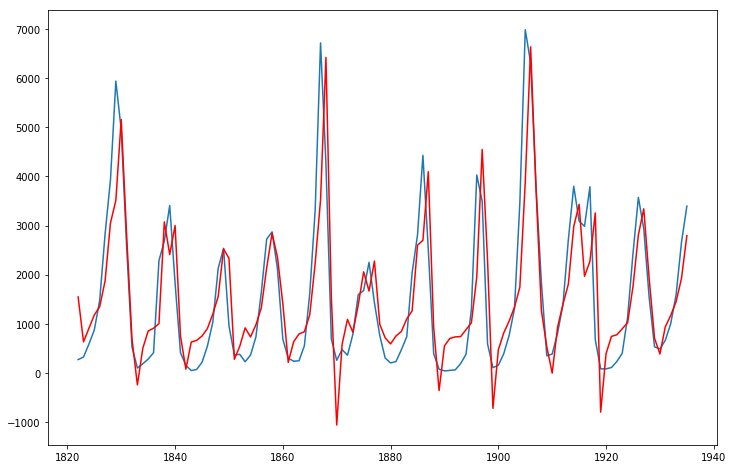

In [104]:
# Using ARIMA for the model, with the argument 'order'
# It is easy to change parameters
model = ARIMA(mylynxts, order=(2, 0, 0))  
results_AR = model.fit()
plt.figure(figsize=(12,8))
plt.plot(mylynxts)
plt.plot(results_AR.fittedvalues, color='red')

In [105]:
# Model Diagnostics
results_AR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  114
Model:                     ARMA(2, 0)   Log Likelihood                -935.016
Method:                       css-mle   S.D. of innovations            876.447
Date:                Wed, 24 Apr 2019   AIC                           1878.032
Time:                        22:04:27   BIC                           1888.977
Sample:                    12-31-1821   HQIC                          1882.474
                         - 12-31-1934                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1545.1192    181.668      8.505      0.000    1189.057    1901.181
ar.L1.y        1.1474      0.074     15.459      0.000       1.002       1.293
ar.L2.y       -0.5998      0.074     -8.110      0.000      -0.745      -0.455
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.9566           -0.8673j            1.2913           -0.1172
AR.2            0.9566           +0.8673j            1.2913            0.1172
-----------------------------------------------------------------------------
"""

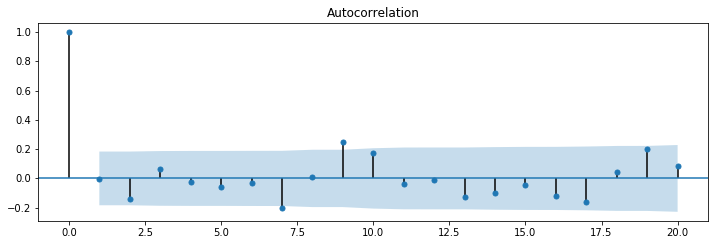

In [106]:
# ACF on Residuals of Our Model
%matplotlib inline
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(results_AR.resid, lags=20, ax=ax1)

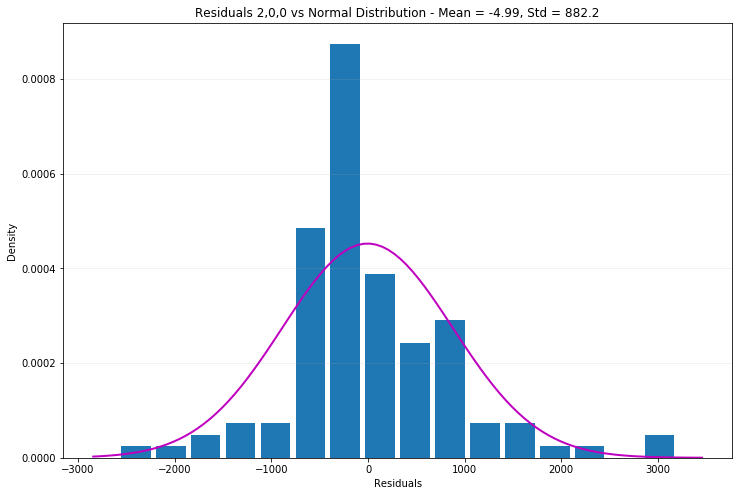

In [107]:
# Histogram of the Residuals
# Importing function for normal distribution
from scipy.stats import norm

plt.figure(figsize = (12, 8))
plt.hist(results_AR.resid, bins = 'auto', density = True, rwidth = 0.85,
         label = 'Residuals') #density TRUE - norm.dist bell curve
mu, std = norm.fit(results_AR.resid)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100) #linspace returns evenly spaced numbers over a specified interval
p = norm.pdf(x, mu, std) #pdf = probability density function
plt.plot(x, p, 'm', linewidth = 2)
plt.grid(axis='y', alpha = 0.2)
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.title('Residuals 2,0,0 vs Normal Distribution - Mean = '+str(round(mu,2))+', Std = '+str(round(std,2)))
plt.show()

In [108]:
# We can readjust the model as often as we like
# Repeat the following procedure for models AR(3), AR(4) and AR(5)
# Which one is the most promising?

In [109]:
# Checking the Residuals: A Close Look
# Example performed on an AR2 model
model = ARIMA(mylynxts, order=(2, 0, 0))  
results_AR = model.fit()

In [110]:
# The last 5 observations for the original data, the fitted values and the residuals
mylynxts.tail()

1930-12-31     662
1931-12-31    1000
1932-12-31    1590
1933-12-31    2657
1934-12-31    3396
Freq: A-DEC, dtype: int64

In [111]:
results_AR.fittedvalues.tail()

1930-12-31     938.126484
1931-12-31    1167.611064
1932-12-31    1449.286498
1933-12-31    1923.554310
1934-12-31    2794.009003
Freq: A-DEC, dtype: float64

In [112]:
results_AR.resid.tail()

1930-12-31   -276.126484
1931-12-31   -167.611064
1932-12-31    140.713502
1933-12-31    733.445690
1934-12-31    601.990997
Freq: A-DEC, dtype: float64

In [113]:
# The mean of the residuals
np.mean(results_AR.resid)

-4.98528939191757

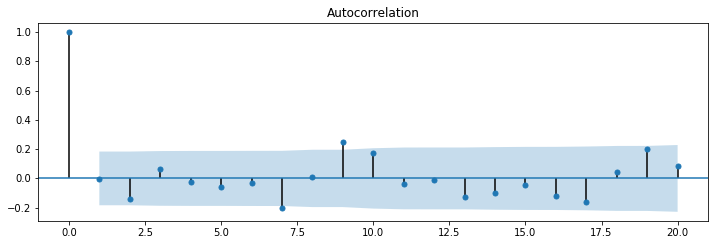

In [114]:
# The ACF Plot
%matplotlib inline
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(results_AR.resid, lags=20, ax=ax1)

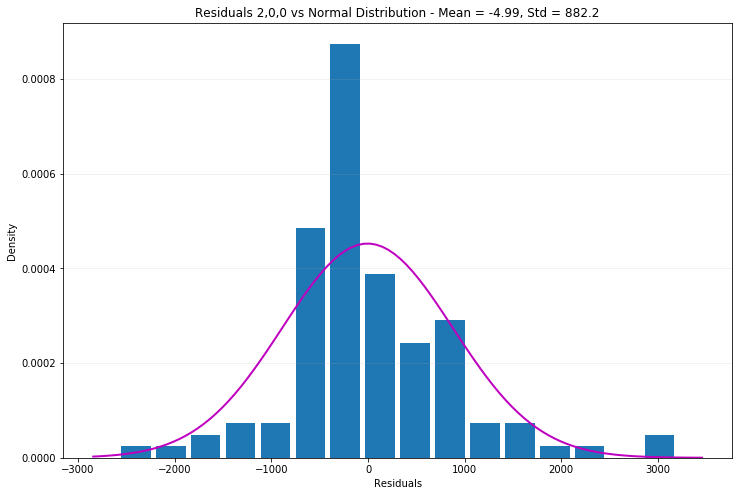

In [115]:
# Histogram on the residuals

plt.figure(figsize = (12, 8))
plt.hist(results_AR.resid, bins = 'auto', density = True, rwidth = 0.85, label = 'Residuals') #density TRUE - norm.dist bell curve
mu, std = norm.fit(results_AR.resid)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100) #linspace returns evenly spaced numbers over a specified interval
p = norm.pdf(x, mu, std) #pdf = probability density function
plt.plot(x, p, 'm', linewidth = 2)
plt.grid(axis='y', alpha = 0.2)
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.title('Residuals 2,0,0 vs Normal Distribution - Mean = '+str(round(mu,2))+', Std = '+str(round(std,2)))
plt.show()

In [116]:
# ARIMA forecasts
# Setting up an ARIMA(4,0,0) model and storing its fitted values
model_AR4 = ARIMA(mylynxts, order=(4, 0, 0))  
results_AR4 = model_AR4.fit()

In [117]:
# Forecast based on the ARIMA(4,0,0) model
Fcast400 = results_AR4.predict(start = '31/12/1935',
                               end = '31/12/1945')

c:\users\rahul udaiwal\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


In [ ]:
# For the comparison, let's set up another model
# Arima(2,0,2) model and its fitted values
model202 = ARIMA(mylynxts, order=(2, 0, 2))  
results_M202 = model202.fit()

In [ ]:
# Forecast based on the ARIMA(2,0,2) model
Fcast202 = results_M202.predict(start = '31/12/1935',
                                end = '31/12/1945')

In [ ]:
# Comparing the forecasts via data visualization
plt.figure(figsize = (12, 8))
plt.plot(mylynxts, linewidth = 2, label = "original")
plt.plot(Fcast400, color='red', linewidth = 2,
         label = "ARIMA 4 0 0")
plt.plot(Fcast202, color='blue', linewidth = 2,
         label = "ARIMA 2 0 2")
plt.legend()

In [ ]:
# Models for Seasonal Data

In [ ]:
# Importing the 'nottem' dataset as a pandas DataFrame
# Make sure that nottem.csv is in the same folder as this python notebook
nottem = pd.read_csv("nottem.csv", header = 0, parse_dates = [0], names = ['Month', 'Temp'], index_col = 0)
print(nottem)

In [ ]:
# Conversion to a pandas Series object
nottemts = pd.Series((nottem.Temp).values,
                     index = pd.date_range('1920-01-31',
                                           periods = 240,
                                           freq = 'M'))

In [ ]:
# Seasonal Decomposition
# Simple seasonal decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

decomposed = seasonal_decompose(nottemts)

In [ ]:
dplot = decomposed.plot()

In [ ]:
# Decomposition based on stl - Package: stldecompose
# Install the library via PIP
# Import the decompose function
from stldecompose import decompose

In [ ]:
# STL decomposition of nottem
stl = decompose(nottemts, period=12)
stl.trend.head()

In [ ]:
# Plotting the STL decomposition
stlvisual = stl.plot()

In [ ]:
# Seasonal Adjustment and Forecasting
nottemadjusted = nottemts - decomposed.seasonal
plt.figure(figsize=(12,8))
nottemadjusted.plot()

In [ ]:
# Getting the seasonal component only
plt.figure(figsize=(12,8))
decomposed.seasonal.plot()

In [ ]:
# Creating a forecast based on STL
from stldecompose import forecast
from stldecompose.forecast_funcs import (naive,
                                         drift, 
                                         mean, 
                                         seasonal_naive)

In [ ]:
fcast = forecast(stl, steps=12, fc_func=seasonal_naive, seasonal = True)

fcast.head()

In [ ]:
# Plot of the forecast and the original data
plt.figure(figsize=(12,8))
plt.plot(nottemts, label='data')
plt.plot(fcast, label=fcast.columns[0])
plt.xlim('1920','1941'); plt.ylim(30,70);
plt.legend()

In [ ]:
# Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
help(ExponentialSmoothing)

In [ ]:
# Setting up the exponential smoothing model (A,N,A)
expsmodel = ExponentialSmoothing(nottemts, seasonal = "additive",
                                 seasonal_periods = 12)

In [ ]:
# Fit model
expsmodelfit = expsmodel.fit()

In [ ]:
# Alpha smoothing coefficient
expsmodelfit.params['smoothing_level']

In [ ]:
# Gamma smoothing coefficient
expsmodelfit.params['smoothing_seasonal']

In [ ]:
# Prediction with exponential smoothing
expsfcast = expsmodelfit.predict(start = 240, end = 251)

In [ ]:
# Plotting the predictied values and the original data
plt.figure(figsize=(12,8))
plt.plot(nottemts, label='data')
plt.plot(expsfcast, label='HW forecast')
plt.xlim('1920','1941'); plt.ylim(30,70);
plt.legend()

In [ ]:
# Comparing the model to the original values
# How good is the model fit?
plt.figure(figsize=(12,8))
plt.plot(nottemts, label='data')
plt.plot(expsmodelfit.fittedvalues, label='HW model')
plt.xlim('1920','1940'); plt.ylim(30,70);
plt.legend()

In [ ]:
# Modeling Seasonal Data with Prophet by Facebook
# Install Prophet via PIP or Conda-Forge

In [ ]:
# Import the function 'Prophet' from the library 'fbprophet'
from fbprophet import Prophet

In [ ]:
nottemts.head()

In [ ]:
# Create a pandas.DataFrame with the values of nottemts
nottem_df = pd.DataFrame({'ds':nottemts.index, 
                          'y':nottemts.values})

In [ ]:
nottem_df.head()

In [ ]:
# Make the prophet model and fit on the data
mymodel = Prophet()
mymodel.fit(nottem_df)

In [ ]:
# Create a forecast with 'mymodel'
future_data = mymodel.make_future_dataframe(periods = 12,
                                            freq = 'm')

fcast = mymodel.predict(future_data)

In [ ]:
mymodel.plot(fcast)